<a href="https://colab.research.google.com/github/ak-sh-at/Bioactivity-Prediction/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install chembl_webresource_client

## **Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

### **Target search for coronavirus**

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.shape

(133, 46)

In [ ]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

In [ ]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

In [ ]:
df2 = df[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [ ]:
df2 = df2[df2.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda --version

conda 23.11.0


In [ ]:
!conda install -c rdkit rdkit
!conda install pandas
!conda install numpy

Channels:
 - rdkit
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    chardet-5.2.0              |  py310hff52083_2         238 KB  conda

In [ ]:
pip install rdkit


 **A sample use of rdkit to draw molecule structure**

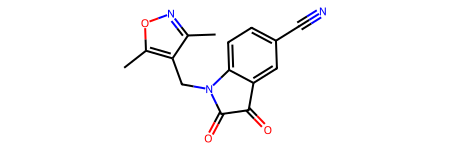

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(df3.iloc[0]["canonical_smiles"])
molecule


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 9.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 8.3 MB/s eta 0:00:0

In [ ]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader


/usr/local/lib/python3.10/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/site-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/site-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = float(i)*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis= 1)

    return x

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if float(i) > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis= 1)

    return x

In [ ]:
df_norm = norm_value(df3)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,5.698970
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,4.970616


In [ ]:
dff = pd.concat([df3, df_final.iloc[:,-1]], axis=1)
dff

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,standard_value_norm,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,7200.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,9400.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,13500.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,13110.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,2000.0,5.698970
...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,10600.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,10100.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,11500.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,10700.0,4.970616


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dff['pIC50'] = scaler.fit_transform(dff['pIC50'].values.reshape(-1, 1))
dff

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,standard_value_norm,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,7200.0,0.462589
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,9400.0,0.336374
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,13500.0,0.165021
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,13110.0,0.178898
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,2000.0,1.068952
...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,10600.0,0.279500
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,10100.0,0.302373
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,11500.0,0.240924
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,10700.0,0.275056


In [ ]:
dff['pIC50'] = dff['pIC50'].round(2)
dff

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,standard_value_norm,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,7200.0,0.46
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,9400.0,0.34
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,13500.0,0.17
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,13110.0,0.18
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,2000.0,1.07
...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,10600.0,0.28
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,10100.0,0.30
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,11500.0,0.24
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,10700.0,0.28


In [ ]:
dff2 = pd.concat([df3, df_final.iloc[:,-1]], axis=1)
dff2

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,standard_value_norm,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,7200.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,9400.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,13500.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,13110.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,2000.0,5.698970
...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,10600.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,10100.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,11500.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,10700.0,4.970616


In [ ]:
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch
import torch.nn as nn
import torch_geometric.nn as pyg_nn
from rdkit import Chem
import numpy as np
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
from sklearn.metrics import r2_score

In [ ]:
dff2['binary_target'] = (dff2['pIC50'] > 5).astype(int)
dff2


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,standard_value_norm,pIC50,binary_target
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,7200.0,5.142668,1
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,9400.0,5.026872,1
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,13500.0,4.869666,0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,13110.0,4.882397,0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,2000.0,5.698970,1
...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,10600.0,4.974694,0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,10100.0,4.995679,0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,11500.0,4.939302,0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,10700.0,4.970616,0


In [ ]:
dff2= dff2[dff2.bioactivity_class != 'intermediate']
dff2

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,standard_value_norm,pIC50,binary_target
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,13500.0,4.869666,0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,13110.0,4.882397,0
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,980.0,980.0,6.008774,1
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,950.0,950.0,6.022276,1
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,11200.0,11200.0,4.950782,0
...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,10600.0,4.974694,0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,10100.0,4.995679,0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,11500.0,4.939302,0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,10700.0,4.970616,0


In [ ]:
def molecule_to_graph(smiles, target, id):
    # Same as before, except using binary target
    mol = Chem.MolFromSmiles(smiles)
    node_features = []
    for atom in mol.GetAtoms():
        atomic_num = atom.GetAtomicNum()
        degree = atom.GetDegree()
        formal_charge = atom.GetFormalCharge()
        hybridization = atom.GetHybridization()
        num_hydrogens = atom.GetTotalNumHs()
        hybridization_map = {
            Chem.rdchem.HybridizationType.SP: 1,
            Chem.rdchem.HybridizationType.SP2: 2,
            Chem.rdchem.HybridizationType.SP3: 3,
        }
        hybridization_value = hybridization_map.get(hybridization, 0)
        node_features.append([
            atomic_num, degree, formal_charge, hybridization_value, num_hydrogens
        ])
    node_features = torch.tensor(node_features, dtype=torch.float)

    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        bond_type = bond.GetBondType()
        bond_type_map = {
            Chem.rdchem.BondType.SINGLE: 1,
            Chem.rdchem.BondType.DOUBLE: 2,
            Chem.rdchem.BondType.TRIPLE: 3,
            Chem.rdchem.BondType.AROMATIC: 4,
        }
        bond_type_value = bond_type_map.get(bond_type, 0)
        edge_index.append([i, j])
        edge_index.append([j, i])
        edge_attr.append([bond_type_value])
        edge_attr.append([bond_type_value])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    data = Data(
        x=node_features,
        edge_index=edge_index,
        edge_attr=edge_attr,
        y=torch.tensor([target], dtype=torch.long),  # Convert to long for classification
        id=id
    )
    return data

# Convert SMILES to graph data
graph_data_list = [
    molecule_to_graph(smiles, target, id)
    for smiles, target, id in zip(dff2['canonical_smiles'], dff2['binary_target'], dff2['molecule_chembl_id'])
]

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch_geometric.nn as pyg_nn
from rdkit import Chem
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Compute pIC50
def pIC50(input):
    input['pIC50'] = -np.log10(input['standard_value_norm'] * 1e-9)
    return input.drop('standard_value_norm', axis=1)

# Molecule to graph
def molecule_to_graph(smiles, target, id):
    mol = Chem.MolFromSmiles(smiles)
    node_features = []
    for atom in mol.GetAtoms():
        atomic_num = atom.GetAtomicNum()
        degree = atom.GetDegree()
        formal_charge = atom.GetFormalCharge()
        hybridization = atom.GetHybridization()
        num_hydrogens = atom.GetTotalNumHs()
        hybridization_map = {
            Chem.rdchem.HybridizationType.SP: 1,
            Chem.rdchem.HybridizationType.SP2: 2,
            Chem.rdchem.HybridizationType.SP3: 3,
        }
        hybridization_value = hybridization_map.get(hybridization, 0)
        node_features.append([
            atomic_num, degree, formal_charge, hybridization_value, num_hydrogens
        ])
    node_features = torch.tensor(node_features, dtype=torch.float)

    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        bond_type = bond.GetBondType()
        bond_type_map = {
            Chem.rdchem.BondType.SINGLE: 1,
            Chem.rdchem.BondType.DOUBLE: 2,
            Chem.rdchem.BondType.TRIPLE: 3,
            Chem.rdchem.BondType.AROMATIC: 4,
        }
        bond_type_value = bond_type_map.get(bond_type, 0)
        edge_index.append([i, j])
        edge_index.append([j, i])
        edge_attr.append([bond_type_value])
        edge_attr.append([bond_type_value])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    data = Data(
        x=node_features,
        edge_index=edge_index,
        edge_attr=edge_attr,
        y=torch.tensor([target], dtype=torch.long),
        id=id
    )
    return data


graph_data_list = [
    molecule_to_graph(smiles, target, id)
    for smiles, target, id in zip(dff2['canonical_smiles'], dff2['binary_target'], dff2['molecule_chembl_id'])
]

train_data, test_data = train_test_split(graph_data_list, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=2, shuffle=True)
test_loader = DataLoader(test_data, batch_size=2, shuffle=False)

# Enhanced GNN Model
class GNNModel(nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.SAGEConv(num_node_features, hidden_channels)
        self.conv2 = pyg_nn.SAGEConv(hidden_channels, hidden_channels)
        self.fc = nn.Linear(hidden_channels, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = pyg_nn.global_mean_pool(x, data.batch)
        x = self.fc(x)
        return x

model = GNNModel(num_node_features=5, hidden_channels=128)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
criterion = nn.CrossEntropyLoss()

# Training
for epoch in range(100):
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step(total_loss)
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

# Evaluation
def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in loader:
            output = model(data)
            preds = torch.argmax(output, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(data.y.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    print(classification_report(all_labels, all_preds))
    print(f'Accuracy: {accuracy * 100:.2f}%')

evaluate_model(model, test_loader)


Epoch 1, Loss: 26.3487
Epoch 2, Loss: 15.9355
Epoch 3, Loss: 17.7166
Epoch 4, Loss: 14.2444
Epoch 5, Loss: 15.1731
Epoch 6, Loss: 13.3845
Epoch 7, Loss: 13.2536
Epoch 8, Loss: 14.7463
Epoch 9, Loss: 14.1655
Epoch 10, Loss: 12.6855
Epoch 11, Loss: 13.4490
Epoch 12, Loss: 13.8763
Epoch 13, Loss: 13.6266
Epoch 14, Loss: 13.3373
Epoch 15, Loss: 13.1078
Epoch 16, Loss: 13.3705
Epoch 17, Loss: 12.9440
Epoch 18, Loss: 12.4658
Epoch 19, Loss: 12.4891
Epoch 20, Loss: 13.2112
Epoch 21, Loss: 12.7442
Epoch 22, Loss: 12.5600
Epoch 23, Loss: 12.0501
Epoch 24, Loss: 12.0906
Epoch 25, Loss: 12.2790
Epoch 26, Loss: 12.8258
Epoch 27, Loss: 12.4675
Epoch 28, Loss: 11.9670
Epoch 29, Loss: 12.6448
Epoch 30, Loss: 12.6086
Epoch 31, Loss: 12.1622
Epoch 32, Loss: 12.5924
Epoch 33, Loss: 13.4129
Epoch 34, Loss: 12.0135
Epoch 35, Loss: 12.1054
Epoch 36, Loss: 11.5285
Epoch 37, Loss: 11.9534
Epoch 38, Loss: 12.0682
Epoch 39, Loss: 11.5270
Epoch 40, Loss: 11.5062
Epoch 41, Loss: 12.4885
Epoch 42, Loss: 11.3436
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score
def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in loader:
            output = model(data)  # Logits
            preds = torch.argmax(output, dim=1)  # Predicted class
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(data.y.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test data
evaluate_model(model, test_loader)

Accuracy: 73.07%


In [ ]:
# Function to extract node features and create a table
def extract_node_features(graph_data_list, df):
    node_features_list = []

    for graph, smiles, mol_id in zip(graph_data_list, df['canonical_smiles'], df['molecule_chembl_id']):
        mol = Chem.MolFromSmiles(smiles)
        for atom_idx, atom in enumerate(mol.GetAtoms()):
            node_features_list.append({
                "Molecule ID": mol_id,
                "Atomic Number": atom.GetAtomicNum(),
                "Degree": atom.GetDegree(),
                "Formal Charge": atom.GetFormalCharge(),
                "Hybridization": atom.GetHybridization().name,
                "Num Hydrogens": atom.GetTotalNumHs(),

            })

    # Convert to pandas DataFrame
    node_features_df = pd.DataFrame(node_features_list)
    return node_features_df
# Extract node features as a table
node_features_df = extract_node_features(graph_data_list, dff2)

# Display the table
print(node_features_df)


       Molecule ID  Atomic Number  Degree  Formal Charge Hybridization  \
0     CHEMBL185698              8       1              0           SP2   
1     CHEMBL185698              6       3              0           SP2   
2     CHEMBL185698              6       3              0           SP2   
3     CHEMBL185698              8       1              0           SP2   
4     CHEMBL185698              7       3              0           SP2   
...            ...            ...     ...            ...           ...   
2998   CHEMBL45830              6       2              0           SP3   
2999   CHEMBL45830              6       2              0           SP3   
3000   CHEMBL45830              6       4              0           SP3   
3001   CHEMBL45830              6       1              0           SP3   
3002   CHEMBL45830              6       1              0           SP3   

      Num Hydrogens  
0                 0  
1                 0  
2                 0  
3                 0  
4

In [ ]:
from rdkit import Chem

# Function to calculate total number of atoms
def calculate_total_atoms(smiles_list):
    total_atoms = 0
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            total_atoms += mol.GetNumAtoms()
    return total_atoms

# Example usage with the 'canonical_smiles' column
smiles_list = dff2['canonical_smiles']  # Replace with your SMILES column
total_atoms = calculate_total_atoms(smiles_list)

print(f"Total Number of Atoms: {total_atoms}")


Total Number of Atoms: 3003


**Ignore the cells below**


In [ ]:
# Evaluate the model on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model.eval()
predictions = []
targets = []
ids = []

with torch.no_grad():
    for data in test_loader:
        output = model(data)

        # Check if output is a scalar or a tensor
        if output.dim() == 0:  # Scalar case
            predictions.append(output.item())
        else:
            # Convert tensor to numpy array
            output_array = output.squeeze().cpu().numpy()
            if output_array.ndim == 1:
                predictions.extend(output_array)
            else:
                predictions.extend(output_array.flatten())

        targets.extend(data.y.cpu().numpy())
        ids.extend(data.id)

# Convert to numpy arrays
targets = np.array(targets)
predictions = np.array(predictions)

# Calculate RMSE
mae = mean_absolute_error(targets, predictions)
mse = mean_squared_error(targets, predictions)
r2 = r2_score(targets, predictions)
rmse = np.sqrt(mse)
# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Optional: Create DataFrame to compare predictions and targets
results_df = pd.DataFrame({
    'ID': ids,
    'Prediction': predictions,
    'Target': targets
})

# Export to CSV
results_df.to_csv('results_test_data.csv', index=False)

# Export to Excel
results_df.to_excel('results_test_data.xlsx', index=False)

Mean Absolute Error (MAE): 0.5132880806922913
Mean Squared Error (MSE): 0.42051562666893005
R² Score: 0.5672561526298523
Root Mean Squared Error (RMSE): 0.6484717726707458


In [ ]:
results_df

,ID,Prediction,Target
0,CHEMBL32,-0.205243,0.46
1,CHEMBL551701,-0.322045,-0.53
2,CHEMBL400074,-0.389486,-1.08
3,CHEMBL4534306,-0.483388,0.08
4,CHEMBL3740580,0.510108,1.28
...,...,...,...
526,CHEMBL1934967,0.058388,-0.61
527,CHEMBL64,1.018279,0.46
528,CHEMBL3633321,-0.196972,-0.41
529,CHEMBL1934926,-0.307595,-0.29
